In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "https://ultralytics.com/images/zidane.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print() 

Using cache found in C:\Users\kba13/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-2 Python-3.11.8 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 1350.5ms pre-process, 5.4ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


In [3]:
!cd yolov5 && python train.py --batch 8 --img 460 --epochs 300 --data data.yaml --weights yolov5s.pt --device 0

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=8, imgsz=460, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-295-gac6c4383 Python-3.11.8 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

In [10]:
cars_model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5/runs/train/exp6/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kba13/.cache\torch\hub\master.zip
YOLOv5  2024-4-2 Python-3.11.8 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [28]:
img = "https://www.fourdotdesignerplates.co.uk/app/uploads/2021/09/m3-with-rear-plate-classic-cropped.jpg"
results1 = cars_model(img)

img = 'https://i.ebayimg.com/images/g/TjsAAOSwa8hkqeDq/s-l1600.jpg'
results2 = cars_model(img)


(-0.5, 959.5, 735.5, -0.5)

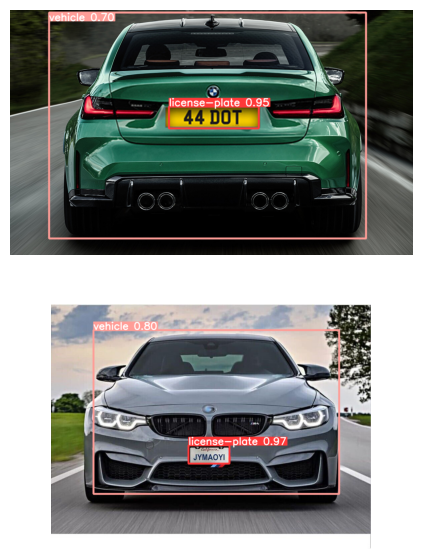

In [30]:
fig = plt.figure(figsize=(10, 7)) 
  
# setting values to rows and column variables 
rows = 2
columns = 1

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(np.squeeze(results1.render())) 
plt.axis('off') 

  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(np.squeeze(results2.render())) 
plt.axis('off') 



In [25]:
img = 'https://i.ebayimg.com/images/g/TjsAAOSwa8hkqeDq/s-l1600.jpg'
results = cars_model(img)
results.print()

image 1/1: 736x960 1 license-plate, 1 vehicle
Speed: 360.1ms pre-process, 25.0ms inference, 37.0ms NMS per image at shape (1, 3, 512, 640)


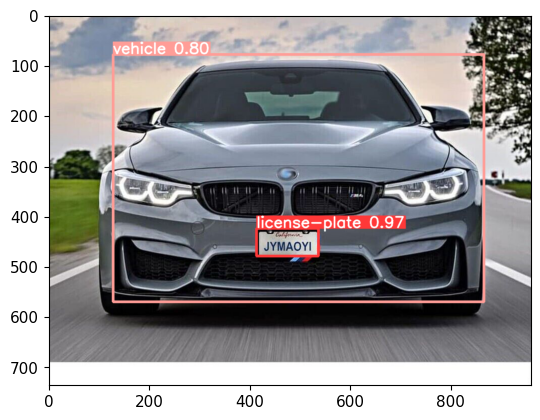

In [26]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()